# SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

#advance plot styling
import seaborn as sns
sns.set()

print("libraries imported")

libraries imported


### Generating dataset

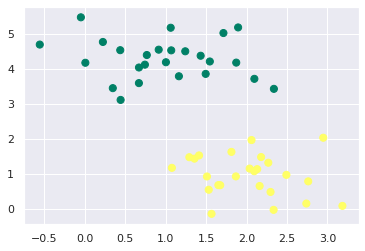

In [10]:
from sklearn.datasets.samples_generator import make_blobs

X,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.6)

plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer');

### creating different seperators

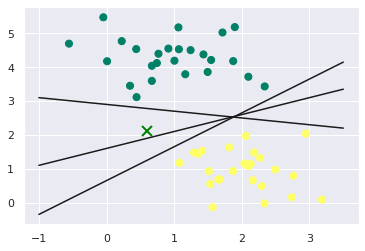

In [12]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')
plt.plot([0.6],[2.1],'x',color='green',markeredgewidth=2,markersize=10)

#creating decision boundaries
for m,b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:      #calculated mathematically
    plt.plot(xfit,m*xfit+b,'-k')

    

#### even though the decision boundaries are linearly seperating the train data, the test data might not be correctly classified by some of them as shown.

### plotting the margins

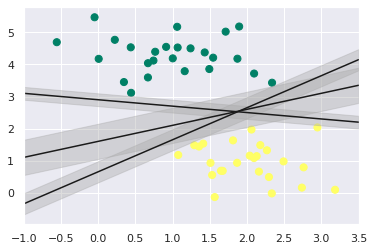

In [14]:
xfit=np.linspace(-1,3.5)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='summer')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    
    plt.fill_between(xfit,yfit-d,yfit+d,edgecolor='none',color='#AAAAAA',alpha=0.4)
plt.xlim(-1,3.5);

### Training SVM using library

In [15]:
from sklearn.svm import SVC    #support vector classifier
model=SVC(kernel='linear',C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Visualizing the Decision Boundaries

In [27]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

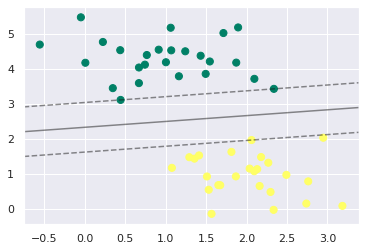

In [28]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='summer')
plot_svc_decision_function(model,plot_support=True);

#### the points on the decision boundaries are my support vectors and can be shown as

In [18]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])